In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-restaurants-in-india/zomato_restaurants_in_India.csv


## Importing Necessary Libraries:-

In [165]:
import numpy as np     
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random
from wordcloud import WordCloud 

## Preprocessing:-

### Exploring Data

In [4]:
df=pd.read_csv("../input/zomato-restaurants-in-india/zomato_restaurants_in_India.csv")

In [5]:
df.shape

(211944, 26)

**There are total 211944 observations and 26 columns in our dataset.**

In [6]:
df.head(10)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
5,3400275,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-civi...,"114/23 G, Deep Shikha Complex, Sanjay Place, C...",Agra,34,Civil Lines,27.201516,78.007556,...,2,Rs.,"['Credit Card', 'Lunch', 'Delivery', 'Dinner',...",4.0,Very Good,707,62,0.0,-1,-1
6,3400296,Honeydew Restaurant,['Quick Bites'],https://www.zomato.com/agra/honeydew-restauran...,"Opposite Soami Bagh Temple, Dayal Bagh, Agra",Agra,34,Dayal Bagh,27.222175,78.010174,...,2,Rs.,"['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takea...",4.2,Very Good,647,46,0.0,1,-1
7,3400368,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-sika...,"Plot C-1/6, Sector 13, Sikandra, Agra",Agra,34,Sikandra,27.203930,77.954260,...,2,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'No Alcoh...",3.8,Good,617,18,0.0,-1,-1
8,3401284,Cake House,['Bakery'],https://www.zomato.com/agra/cake-house-2-civil...,"23/301, Wazirpura Rd, Judge Compound Chowraha,...",Agra,34,Civil Lines,27.204148,78.009025,...,2,Rs.,"['Takeaway Available', 'Cash', 'Indoor Seating...",3.4,Average,322,14,0.0,1,-1
9,3400838,Sugar N Thyme,['Café'],https://www.zomato.com/agra/sugar-n-thyme-tajg...,"1374 K/1375 K, Ground floor, Dinesh Nagar, Fat...",Agra,34,Tajganj,27.158243,78.045591,...,3,Rs.,"['No Alcohol Available', 'Dinner', 'Delivery',...",4.4,Very Good,289,324,0.0,1,-1


In [7]:
df.tail()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1
211943,18879846,Freshco's - The Health Cafe,['Café'],https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,Very Good,93,53,0.0,1,-1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

df.info() method provides the schema of the database such as number of rows and columns alongwith their data types.

It also species the count of non-null values from which we can easily know how many null values or missing values are present in each column. 

Finding null values is one of the important step of data cleaning.

**From the above output, it is clear that there are null values present in our dataset**

In [9]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


describe function provides statistical information about numerical data.

In [10]:
# In the above output, we can see that the describe function only displays values for quantitative features

# So, to define categorical features statistically, we will use:-

df.describe(include=object)

,name,establishment,url,address,city,locality,zipcode,locality_verbose,cuisines,timings,currency,highlights,rating_text
count,211944,211944,211944,211810,211944,211944,48757,211944,210553,208070,211944,211944,211944
unique,41100,27,55568,50657,99,3731,1311,3910,9382,7740,1,31455,39
top,Domino's Pizza,['Quick Bites'],https://www.zomato.com/chennai/3bs-buddies-bar...,"Laxman Jhula, Tapovan, Rishikesh",Chennai,Civil Lines,0,"Ana Sagar Lake, Ajmer",North Indian,11 AM to 11 PM,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",Very Good
freq,3108,64390,169,299,11630,3660,7100,1760,15996,26605,211944,3352,65451


**From the above code, we can analyse the total counts, number of unique values, top values(mode) and the frequency of the mode for each and every categorical columns.**

## Removing Duplicate Rows

Removing duplicate rows is another important step of data cleaning. It is necessary to remove duplicates to avoid biasness in our analysis.

In [11]:
df.drop_duplicates(["res_id"],keep='first',inplace=True)
df.shape

(55568, 26)

* In the above code, res_id is used to remove the duplicated rows because it is an unique column, no two resturants will have a same res_id.

* keep=first will keep the first occurence of the res_id and inplace=True will modified the dataframe after performing the duplicate operation.

* After removing duplicate rows, we are left with 55568 rows out of 211944 rows which signifies that almost 75% of our data was duplicated. Good we got it before performing analysis on it, now we are left with 55568 resturants to perform analysis on.

## Dealing with Missing Values

In [12]:
print(df.isnull().sum())

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64


So, there are 5 columns with missing values. Since,zipcode has almost 80% of data missing, so, it is better to drop this column than to replace or fill the missing values. 
For rest of the columns, we need to analyze that are they important for our analysis or not. If we need these columns for our analysis then, we need to deal with missing values using some imputation and if not, then we can drop these columns.

## Dropping not useful features

### Let's see what feautures we can omit to make our analysis better:-

#### 1. res_id and name both can't be dropped.
    
#### 2. Let's check ***establishment column*** once.

In [13]:
df["establishment"].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

##### From the above output, we can clearly see that there is an empty string present in this column. Firstly, let's replace it with NA.

In [14]:
df["establishment"]= df["establishment"].replace("[]","NA")

df["establishment"].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", 'NA', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

##### Now, we can see that EDA can be performed on this column, but all the values are in square brackets and double quotes which is unwanted and seems irritating. So, let's remove them using **apply() method**.

In [15]:
df["establishment"]= df["establishment"].apply(lambda x:x[2: -2])

In [16]:
print(df["establishment"].unique())

['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' '' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']


 Now, moving to other features resturant's url and address is again not needed. ***Address has long string values which will be difficult to classify and resturant's url is not important for our analysis***.

#### Let's see city as it can be an important feature for citywise resturant's analysis.

In [17]:
df["city"].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

#### This looks good!

Moving to another important feature that is **locality**, let's see how many unique values we have in this column.

In [18]:
df["locality"].nunique() # to find number of unique values.

3731

There are total **3731 unique localities** which is good but again, so many values can affect our EDA. So, we will drop it for now.

#### Other features like longitude, latitude, zipcode and country_id can also be dropped. As, longitude and latitude will only be needed during geographical analysis while zipcode has a lot of null values(as discussed above) and country_id is not needed because the data is for one country only that is India.

Let's look at **cuisines** feature, as it is one of the differentiationg feature among resturants.

In [19]:
df["cuisines"].nunique()

9382

In [20]:
df["cuisines"].isnull().sum()

470

#### Although there are **9382 unique cuisines**, we will consider it as it is one of the differentiating factor. But, first we need to replace the **470 null values** with some label.

In [21]:
df["cuisines"]= df["cuisines"].fillna("No cuisine mentioned")

df["cuisines"].unique()

array(['North Indian, South Indian, Mithai, Street Food, Desserts',
       'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food',
       'Fast Food, Mithai', ...,
       'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai',
       'North Indian, Chinese, Mexican, Italian, Thai, Continental',
       'North Indian, Lucknowi, Chinese'], dtype=object)

#### From the above output, we can see that each restaurant has a list of cusinies and the composition of the list is the reason why we have so many different cuisine classes. Let's check actual number of unique cuisine classes.

In [22]:
cuisines = []
df["cuisines"].apply(lambda x : cuisines.extend(x.split(", ")))
cuisines = pd.Series(cuisines)
print("Total number of unique cuisines = ", cuisines.nunique())

Total number of unique cuisines =  134


#### timings - This also has missing data, however it has 7740 unique classes. Also, it is not structured even if we try to reduce the number classes like we did in cuisines. Its better to omit it altogether.

#### Let's check **average_cost_for_two** as it seems important for our analysis.

In [23]:
df["average_cost_for_two"].unique()

array([  700,   600,   300,  1000,   400,   500,  1200,  1600,   250,
         200,   150,  1500,   800,   450,   850,   350,   900,  6000,
         650,   550,  2500,  6500,  5500,  4300,  3600,  3500,  3200,
        3000,  2800,  2000,  1800,  1400,  1300,  1250,  1150,  1100,
        1050,    50,    60,   100,   750,     0,   220,   260,   950,
        1900,  2400,  2300,  2200,  1700,  1230,    70,   140,   120,
         470,    20,    40,   110,    80,    90,   440,  2100, 14000,
        5000,  4500,  4100,  4000,  3700,  3400,  2700,  2600,  1650,
        1350,   180,  1260,     2,   197,   312,   170,   240,   330,
        3100,  4200,  1850,  3300,  4800,  3800,  3250,  2900,  1750,
         282,    35,   149,  1550,  5100,  6600,  1450,   160,  2250,
        8000,  7000,  3900,  3650,  1020,   320,   360,   280,   130,
       15000,  2501,    30,  1950,  1875,  1190,   309, 12000,   380,
         299,    45,   190,  4600,   880,    75,   620,   999, 10000,
         505, 30000,

#### From the above output, we can see that it has values like "0" and "2" which can act as outliers but still, it's an interesting feature for analysis so, we will use it.

In [24]:
# Next feature is highlights

df["highlights"].nunique()

31228

In [25]:
df["highlights"].unique()

array(["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']",
       "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']",
       "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']",
       ...,
       "['Dinner', 'Delivery', 'Cash', 'Takeaway Available', 'Free Parking', 'Digital Payments Accepted', 'Pure Veg', 'Indoor Seating']",
       "['Dinner', 'Cash', 'Takeaway Available', 'Lunch', 'Delivery', 'Free Parking', 'Indoor Seating', 'Air Conditioned', 'Outdoor Seating', 'Digital Payments Accepted', 'Catering Available', 'Pure Veg']",
       "['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Delivery', 'Credit Card', 'Free Parking', 'Outdoor Seating']"],
      dtype=object)

#### From the above output, we can see that each restaurant has a list of highlights and the composition of the list is the reason why we have so many different highlights classes just like we got in cuisine column. Let's check actual number of unique highlights.

In [26]:
hl = []
df["highlights"].apply(lambda x : hl.extend(x[2:-2].split("', '")))
hl = pd.Series(hl)
print("Total number of unique highlights = ", hl.nunique())
print("Unique highlights = ", hl.unique())

Total number of unique highlights =  104
Unique highlights =  ['Lunch' 'Takeaway Available' 'Credit Card' 'Dinner' 'Cash'
 'Air Conditioned' 'Indoor Seating' 'Pure Veg' 'Delivery'
 'No Alcohol Available' 'Breakfast' 'Outdoor Seating' 'Self Service'
 'Digital Payments Accepted' 'Desserts and Bakes' 'Smoking Area'
 'Dance Floor' 'Serves Alcohol' 'Debit Card' 'Wine' 'Live Music' 'Rooftop'
 'Live Sports Screening' 'Fullbar' 'Beer' 'Serves Cocktails'
 'Table booking recommended' 'Available for Functions' 'Resto Bar'
 'Hookah' 'Wifi' 'DJ' 'Live Entertainment' 'City View' 'Free Parking'
 'Free Wifi' 'Table booking not available'
 'Table Reservation Not Required' 'Axis Bank - Dining Delights'
 'No Seating Available' 'Buffet' 'Serves Jain Food' 'Poolside'
 'Table reservation required' 'Restricted Entry' 'Valet Parking Available'
 'Sodexo' '4/5 Star' 'Karaoke' 'Kid Friendly'
 'Private Dining Area Available' 'Nightlife' 'Gluten Free Options'
 'Luxury Dining' 'Wheelchair Accessible' 'Above 18 Only

#### Another set of important features to look for are:-

1. aggregate_rating - Rating given to the restaurant

2. votes - Number of votes contributing to the rating

3. photo_count - Photo uploads in reviews


These features are important for our analysis. So, let's check average, min and maximum of these features so that we can use it for comparing resturants.

In [27]:
df[["aggregate_rating","votes","photo_count"]].describe().loc[["mean","min","max"]]

,aggregate_rating,votes,photo_count
mean,2.958593,223.330352,160.97477
min,0.000000,-18.000000,0.00000
max,4.900000,42539.000000,17702.00000


The negative value in votes might be an outlier.

### As we have taken a deep look at our data, let's start with our EDA!

## EDA (Exploratory Data Analysis)

### Chains v/s Outlets

In [28]:
# Firstly, we will find out how many resturants have more than one outlet and are part of resturant chains

df["name"].unique()

array(['Bikanervala', 'Mama Chicken Mama Franky House', 'Bhagat Halwai',
       ..., 'Red China', 'Wah Ustad', 'Geeta lodge'], dtype=object)

In [50]:
chain=[]
single=[]

In [51]:
outlets=df["name"].value_counts()

outlets

Domino's Pizza                           399
Cafe Coffee Day                          315
KFC                                      204
Baskin Robbins                           202
Keventers                                189
                                        ... 
Boulevard 69                               1
7-Eleven Restaurant                        1
Food station                               1
Silver Saloon - Taj Usha Kiran Palace      1
Geeta lodge                                1
Name: name, Length: 41100, dtype: int64

In [52]:
for i in outlets:
    if (i >=2):
        chain.append(i)
    elif(i==1):
        single.append(i)

In [62]:
l=len(single)
print("Total Resturants: ", df.shape[0])
print("Total Resturant Chains: ",df.shape[0]-l)
print("Percentage of Restaurants that are part of a chain = ", np.round((df.shape[0] - l) / df.shape[0],2)*100, "%")

Total Resturants:  55568
Total Resturant Chains:  19358
Percentage of Restaurants that are part of a chain =  35.0 %


#### From the above output, it is clear that 35% or total 19,358 resturants out of 55,568 resturants are part of a resturant chain.

#### Let's do some more analysis using resturant chains data:-

**1. Top 10 resturant chains(by number of outlets)**

In [88]:
top10_chains = df["name"].value_counts()[:10].sort_values(ascending=True)

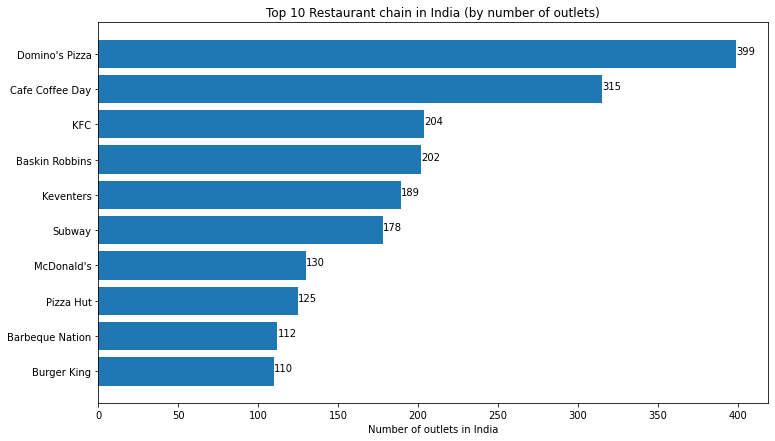

In [108]:
x = top10_chains.values
y = top10_chains.index
fig = plt.figure(figsize=(12,7))
plt.xlabel("Number of outlets in India")
plt.title("Top 10 Restaurant chain in India (by number of outlets)")
for index, value in enumerate(x):
    plt.text(value, index,
             str(value))
plt.barh(y,x)
plt.show()

**2. Top restaurant chains (by average rating)**

In [113]:
outlets = df["name"].value_counts()

In [124]:
#Here, we will consider only those resturants who atleast have 5 outlets to avoid outliers

atleast_5_outlets = outlets[outlets >=5]

In [125]:
top10_chains2 = df[df["name"].isin(atleast_5_outlets.index)].groupby("name").mean()["aggregate_rating"].sort_values(ascending=False)[:10].sort_values(ascending=True)

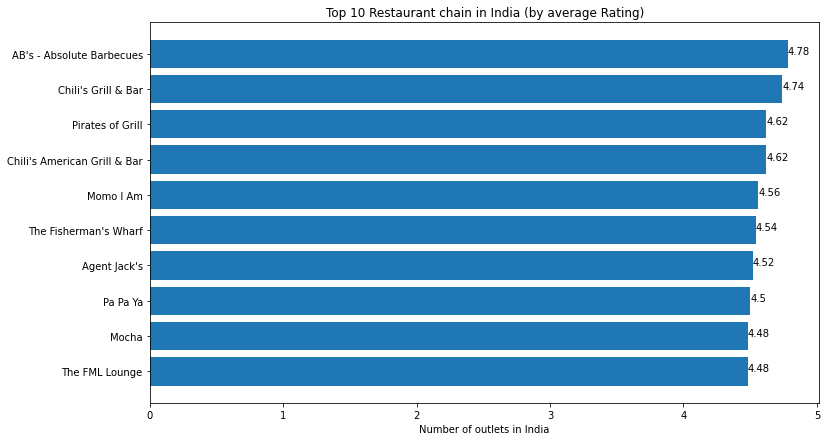

In [126]:
x = pd.Series(top10_chains2.values).map(lambda x : np.round(x, 2))
y = top10_chains2.index

fig = plt.figure(figsize=(12,7))
plt.xlabel("Number of outlets in India")
plt.title("Top 10 Restaurant chain in India (by average Rating)")
for index, value in enumerate(x):
    plt.text(value, index,
             str(value))
plt.barh(y,x)
plt.show()

#### There is an interesting thing to notice in the above two plots. Top 10 resturant chains on the basis of number of outlets was dominated by fast food outlets but when it comes on the basis of average rating then, there is no fast food outlet in top 10.

### Establishment 

**1. Number of restaurants (by establishment type)**

<AxesSubplot:title={'center':'Number of restaurants (by establishment type)'}, xlabel='Top 5 establishment types', ylabel='establishment'>

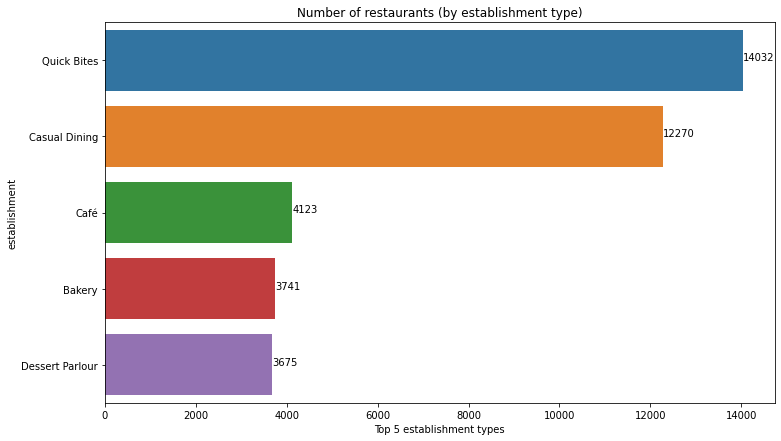

In [132]:
estb_count = df.groupby("establishment").count()["res_id"].sort_values(ascending=False)[:5]
x= estb_count.values
y= estb_count.index

fig = plt.figure(figsize=(12,7))
plt.xlabel("Top 5 establishment types")
plt.title("Number of restaurants (by establishment type)")
for index, value in enumerate(x):
    plt.text(value, index,
             str(value))
sns.barplot(y= estb_count.index,x= estb_count.values)


**2. Top 5 establishment type on the basis of average rating**

<AxesSubplot:title={'center':'Top 5 establishment type on the basis of average rating'}, xlabel='Top 5 establishment types', ylabel='establishment'>

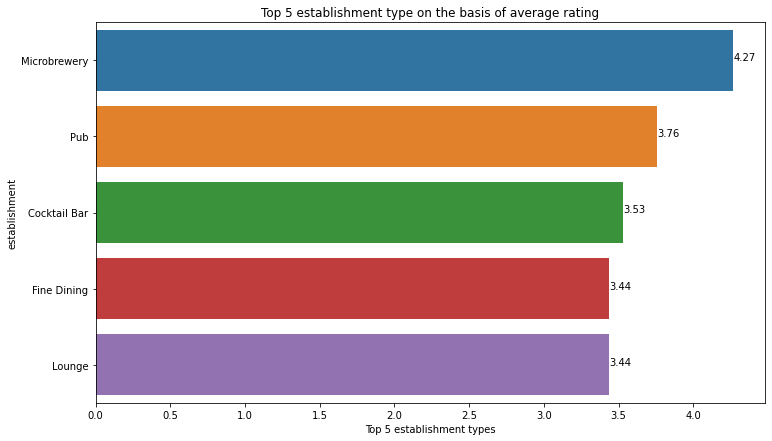

In [136]:
estb_by_rating = df.groupby("establishment").mean()["aggregate_rating"].sort_values(ascending=False)[:5]

x= pd.Series(estb_by_rating.values).map(lambda x : np.round(x, 2))
y= estb_by_rating.index

fig = plt.figure(figsize=(12,7))
plt.xlabel("Top 5 establishment types")
plt.title("Top 5 establishment type on the basis of average rating")
for index, value in enumerate(x):
    plt.text(value, index,
             str(value))
sns.barplot(y= estb_by_rating.index
,x= estb_by_rating.values)


### Cities

**1. Number of restaurants (by city)**

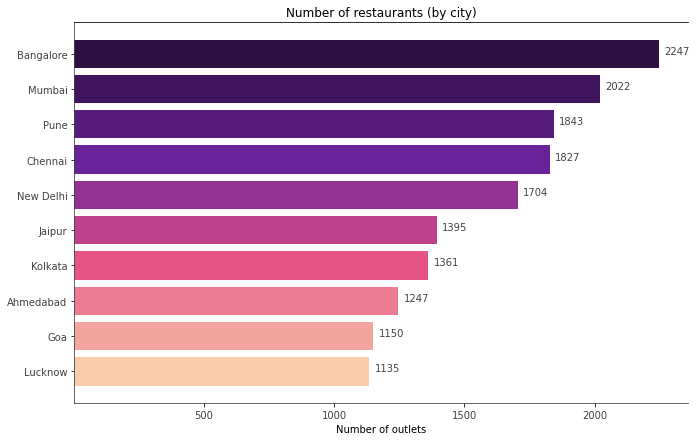

In [138]:
city_counts = df.groupby("city").count()["res_id"].sort_values(ascending=True)[-10:]

height = pd.Series(city_counts.values)
bars = city_counts.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]
plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets")

for i, v in enumerate(height):
    ax.text(v + 20, i, str(v), color='#424242')
plt.title("Number of restaurants (by city)")


plt.show()


As expected, metro cities have more number of restaurants than others with South India dominating the Top 4. 

**2. Average rating, votes and photos (by city)**

In [139]:
rating_by_city = df.groupby("city").mean()["aggregate_rating"].sort_values(ascending=False)[:10]
rating_by_city

city
Gurgaon         3.828525
Secunderabad    3.822222
Hyderabad       3.755839
Kolkata         3.751947
New Delhi       3.727347
Mumbai          3.709298
Bangalore       3.698175
Noida           3.620307
Chennai         3.597701
Pune            3.509224
Name: aggregate_rating, dtype: float64

In [140]:
# To check the number of outlets in each of the above establishment type

city_count = df.groupby("city").count()["name"].sort_values(ascending=False)
rating_by_city_map = city_count.index.isin(rating_by_city.index)
city_count = city_count[rating_by_city_map][rating_by_city.index]
city_count

city
Gurgaon          610
Secunderabad      90
Hyderabad        822
Kolkata         1361
New Delhi       1704
Mumbai          2022
Bangalore       2247
Noida            261
Chennai         1827
Pune            1843
Name: name, dtype: int64

In [141]:
df.groupby("city").mean()["votes"].sort_values(ascending=False)[:10]

city
Hyderabad       955.549878
Secunderabad    955.433333
Mumbai          797.158259
Bangalore       724.940365
New Delhi       711.116197
Kolkata         615.706833
Gurgaon         613.180328
Noida           515.570881
Pune            475.715681
Navi Mumbai     443.342995
Name: votes, dtype: float64

In [142]:
df.groupby("city").mean()["photo_count"].sort_values(ascending=False)[:10]

city
Mumbai         882.273492
New Delhi      764.258216
Gurgaon        678.491803
Kolkata        667.558413
Navi Mumbai    547.323671
Thane          514.963855
Noida          492.291188
Bangalore      462.287939
Hyderabad      377.274939
Pune           333.320130
Name: photo_count, dtype: float64

Gurgaon has highest rated restaurants whereas Hyderabad has more number of critics. Mumbai and New Delhi dominates for most photo uploads per outlet.

### Cuisines(distinct)

**1. Number of restaurants (by cuisine)**

<AxesSubplot:title={'center':'Number of restaurants (by cuisine type)'}, xlabel='Top 5 cuisine types'>

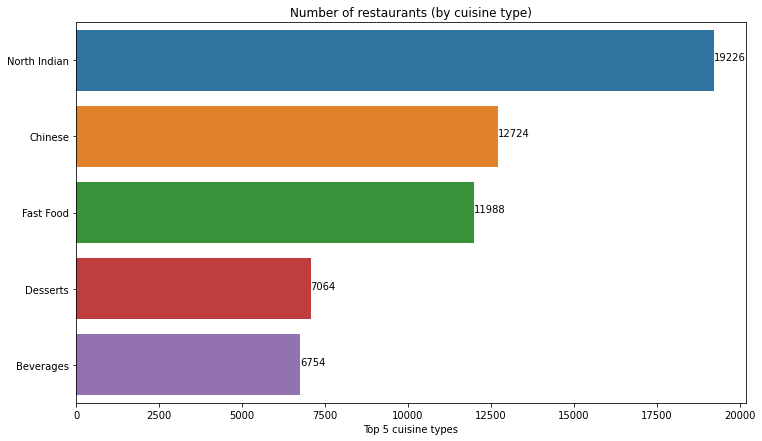

In [144]:
c_count = cuisines.value_counts()[:5]

x= c_count.values
y= c_count.index

fig = plt.figure(figsize=(12,7))
plt.xlabel("Top 5 cuisine types")
plt.title("Number of restaurants (by cuisine type)")
for index, value in enumerate(x):
    plt.text(value, index,
             str(value))
sns.barplot(y= c_count.index,x= c_count.values)


As expected, North Indian is the most preffered cuisine but surprisingly, chineese is preffered over Fast Food and Desserts in India.

### Highlights

**1. Number of restaurants (by highlights)**

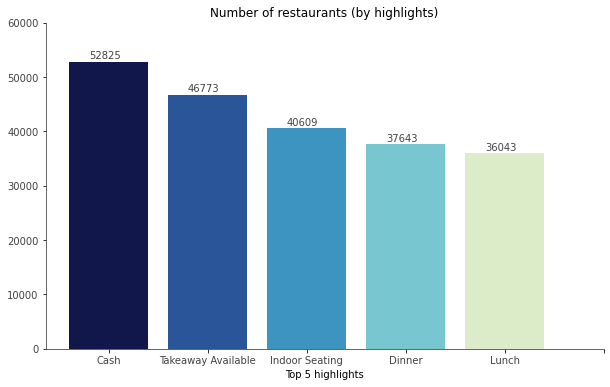

In [158]:
h_count = hl.value_counts()[:5]

fig = plt.figure(figsize=[10,6], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#11174b', '#2a5599', '#3e94c0', '#78c6d0', '#dcecc9']
plt.bar(h_count.index, h_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 70000, 10000), color="#424242")
plt.xlabel("Top 5 highlights")

for i, v in enumerate(h_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by highlights)")


plt.show()


Top 5 highlights doesn't convey much information since they are very trivial to almost every restaurant.

**2. Highlights wordcloud**

***Here we will create a wordcloud of top 30 highlights***

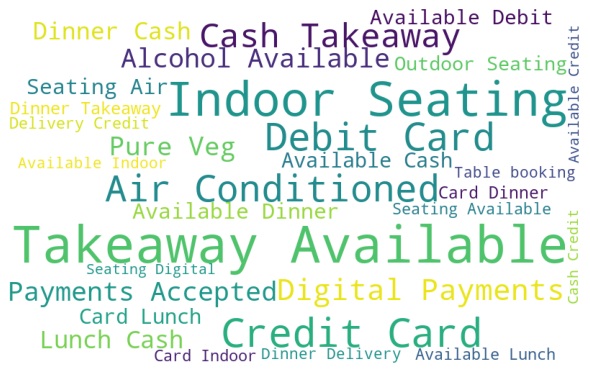

In [166]:
hl_str = ""
for i in hl:
    hl_str += str(i) + " "
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 10, max_words=30).generate(hl_str) 
                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Ratings and Cost Distribution

**1. Ratings distribution**

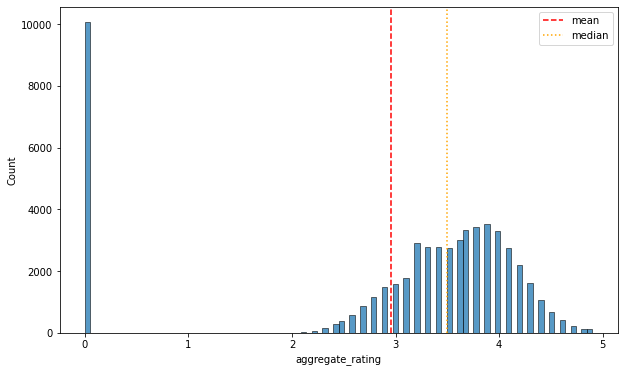

In [170]:
fig = plt.figure(figsize=[10,6], frameon=False)
sns.histplot(df['aggregate_rating'])
plt.axvline(x=np.mean(df['aggregate_rating']),color='red',ls='--',label='mean')
plt.axvline(x=np.median(df['aggregate_rating']),color='orange',ls=':',label='median')
plt.legend()

From the above graph it is clear that the distribution is negatively skewed. Also, huge spike at 0 is might be the case where the resturant is newly opened or unrated.

**2. Avergae cost for two distribution**

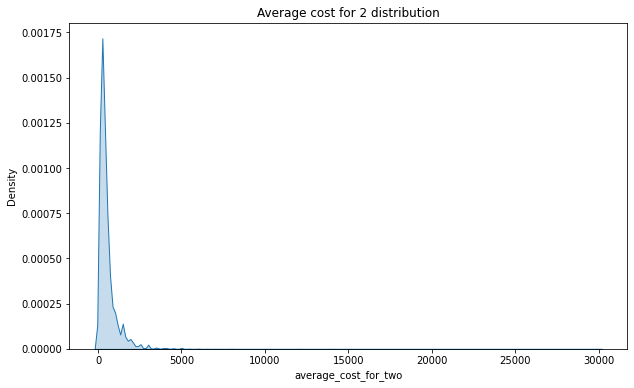

In [175]:
fig = plt.figure(figsize=[10,6])
sns.kdeplot(df['average_cost_for_two'], shade=True)
plt.title("Average cost for 2 distribution")
plt.show()

With few restaurants charging average of Rs.5000+ for two, this graph is extremely skewed. Let's take a closer look at a lower range of 0 to 6000.

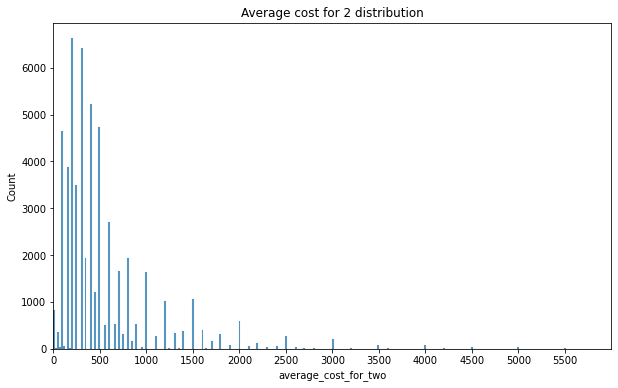

In [181]:
fig = plt.figure(figsize=[10,6])
sns.histplot(df['average_cost_for_two'])
plt.xlim([0, 6000])
plt.xticks(range(0,6000,500))
plt.title("Average cost for 2 distribution")
plt.show()

Maximum Resturants have average cost for two between 100 to 700.

**3. Relation between Average price for two and Rating**

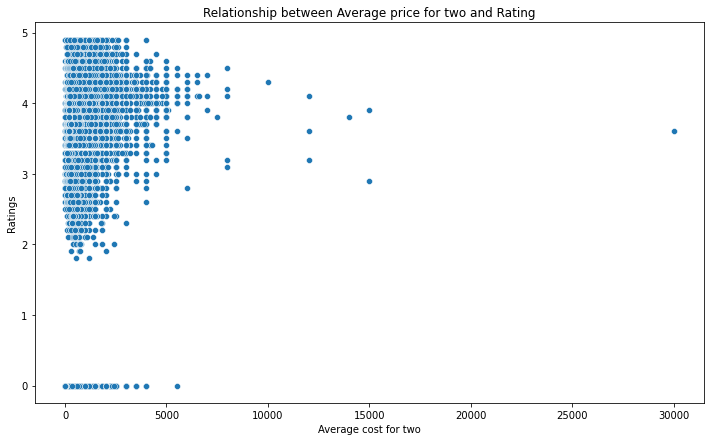

In [183]:
fig = plt.figure(figsize=[12,7])
plt.title("Relationship between Average price for two and Rating")
sns.scatterplot(x='average_cost_for_two', y= 'aggregate_rating', data = df)
plt.xlabel("Average cost for two")
plt.ylabel("Ratings")
plt.show()

The above graph shows that there is positive relationship between them which means with the increase of one factor there is increase in other factor as well.

**4. Relation between Price range and Rating**

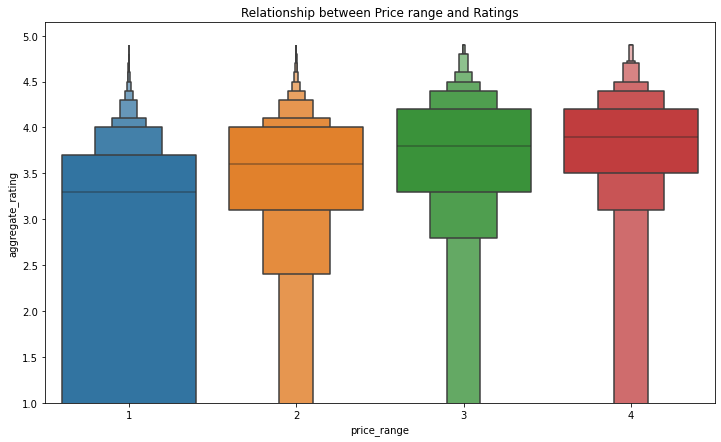

In [187]:
fig = plt.figure(figsize=[12,7])
sns.boxenplot(x='price_range', y='aggregate_rating', data=df)
plt.ylim(1)
plt.title("Relationship between Price range and Ratings")
plt.show()

Again, these 2 factors share positive relationship that is with higher price a resturant is charging, the more rating they have.

## Conclusions

#### After working on this data, we can conclude the following things:-

1. Approx. 35% of restaurants in India are part of some chain

2. Domino's Pizza, Cafe Coffee Day, KFC are the biggest fast food chains in the country with most number of outlets

3. Barbecues and Grill food chains have highest average ratings than other type of restaurants

4. Quick bites and casual dining type of establishment have most number of outlets

5. Establishments with alcohol availability have highest average ratings

6. Banglore has most number of restaurants

7. Gurgaon has highest rated restaurants (average 3.83) whereas Hyderabad has more number of critics (votes). Mumbai and New Delhi dominates for most photo uploads per outlet

8. After North Indian, Chinese is the most prefered cuisine in India

9. Gastro pub, Romantic Dining and Craft Beer features are well rated by customers

10. Most restaurants are rated between 3 and 4

11. Majority of restaurants are budget friendly with average cost of two between Rs.100 to Rs.700

12. There are less number of restaurants at higher price ranges

13. As the average cost of two increases, the chance of a restaurant having higher rating increases


Please give this notebook an upvote if you find it useful!